In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests as GCT
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

In [62]:
data = pd.read_csv("UBER.csv",index_col="Date",parse_dates=['Date'])
print(data.shape)
data.head()

(605, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


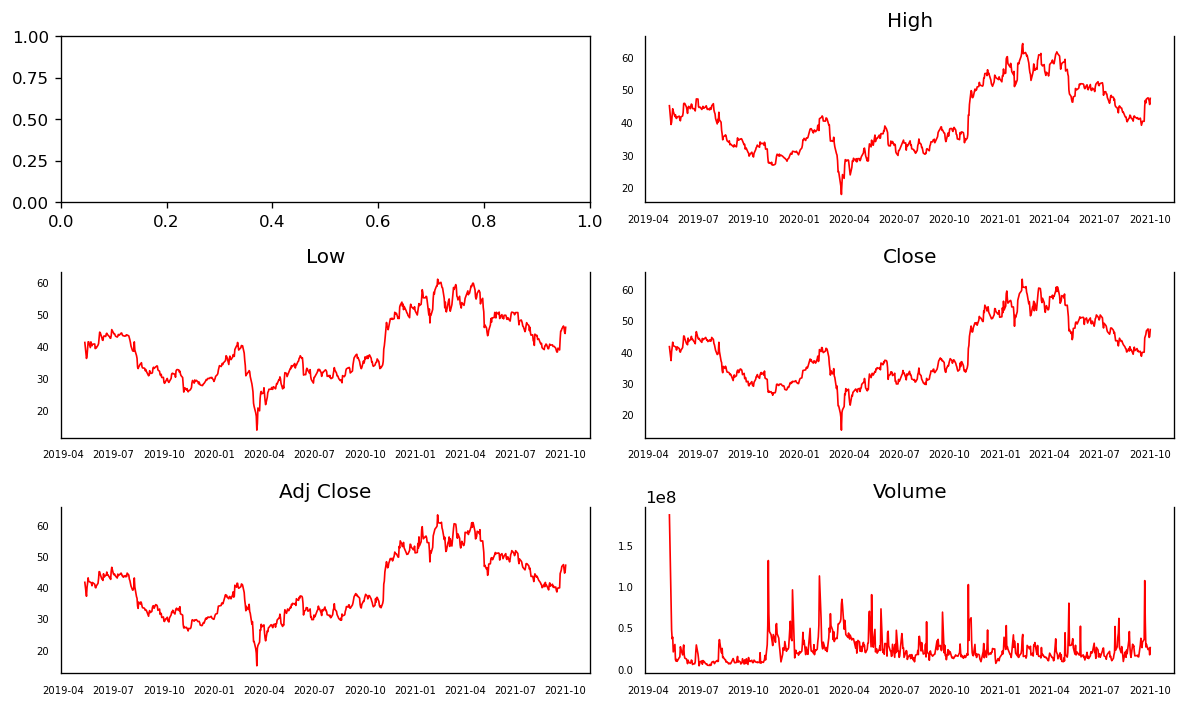

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i == 0:
        continue
    d = data[data.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

# plt.plot(data['Close'])
# plt.plot()

In [106]:
data = data.resample('D').ffill().reset_index() # fill in for sat & sun
data.set_index('Date',inplace=True)

In [64]:
ad = adfuller(data['Volume'])#.diff()[1:]
print(f'ADF Statistic: {ad[0]}')
print(f'p-value: {ad[1]}')

ADF Statistic: -4.67092239419434
p-value: 9.539891701553384e-05


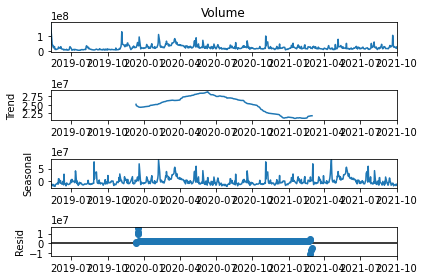

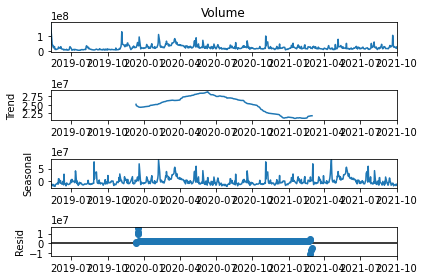

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(data['Volume'],period=300)
results.plot()

In [48]:
# help(seasonal_decompose)

In [70]:
g1 = GCT(data[['Open', 'Volume']],4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9815  , df_denom=601, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9814  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9814  , df=1
parameter F test:         F=0.0005  , p=0.9815  , df_denom=601, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8584  , p=0.4244  , df_denom=598, df_num=2
ssr based chi2 test:   chi2=1.7312  , p=0.4208  , df=2
likelihood ratio test: chi2=1.7287  , p=0.4213  , df=2
parameter F test:         F=0.8584  , p=0.4244  , df_denom=598, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3892  , p=0.2451  , df_denom=595, df_num=3
ssr based chi2 test:   chi2=4.2165  , p=0.2390  , df=3
likelihood ratio test: chi2=4.2018  , p=0.2405  , df=3
parameter F test:         F=1.3892  , p=0.2451  , df_denom=595, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7950  , p=0.5286  

In [107]:
data_ = data[['Open', 'Volume']]
# data_ = data_.resample('D').ffill().reset_index() # fill in for sat & sun

train = data_[:-12]
test = data_[-12:]
test.shape

(12, 2)

In [108]:
test.head()

,Open,Volume
Date,,
2021-09-20,38.880001,35417600
2021-09-21,42.340000,106631700
2021-09-22,44.900002,56455100
2021-09-23,45.349998,26232800
2021-09-24,45.459999,29458300


In [109]:
model = VAR(train.diff()[1:])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [110]:
so = model.select_order(maxlags=20)
print(so.summary())
# print(train.index.freq)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.76       32.77   1.690e+14       32.77
1        32.70      32.73*   1.591e+14      32.71*
2        32.71       32.76   1.603e+14       32.73
3        32.69       32.77   1.573e+14       32.72
4        32.68       32.78   1.557e+14       32.72
5        32.68       32.80   1.561e+14       32.73
6        32.68       32.82   1.555e+14       32.73
7        32.68       32.85   1.558e+14       32.74
8       32.67*       32.86  1.546e+14*       32.75
9        32.67       32.89   1.549e+14       32.76
10       32.68       32.92   1.558e+14       32.77
11       32.68       32.94   1.556e+14       32.78
12       32.68       32.96   1.564e+14       32.79
13       32.69       32.99   1.572e+14       32.80
14       32.69       33.01   1.573e+14       32.81
15       32.69       33.04   1.575e+14       32.82
16       32.69       33.06   1.

In [111]:
var_model = VARMAX(train, order=(8,0), enforce_stationary=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Statespace Model Results                           
Dep. Variable:     ['Open', 'Volume']   No. Observations:                  864
Model:                         VAR(8)   Log Likelihood              -16604.147
                          + intercept   AIC                          33282.294
Date:                Tue, 01 Feb 2022   BIC                          33458.472
Time:                        01:34:13   HQIC                         33349.727
Sample:                    05-10-2019                                         
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.04, 2.52   Jarque-Bera (JB):     820.76, 17620.22
Prob(Q):                        0.83, 0.11   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.02, 0.37   Skew:                       0.05, 2.67
Prob(H) (two-sided):            0.00,

In [133]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train), end=len(train)+n_forecast-1)
predictions = predict.predicted_mean

In [134]:
predictions.columns = ['Open_pred', 'Volume_pred']

In [135]:
predictions
# train.iloc[-1]

,Open_pred,Volume_pred
2021-09-20,39.844003,2.990592e+07
2021-09-21,39.794927,2.894017e+07
2021-09-22,39.875188,2.867573e+07
2021-09-23,39.914726,2.679509e+07
2021-09-24,39.929384,2.597249e+07
2021-09-25,39.926954,2.552646e+07
2021-09-26,39.917031,2.533350e+07
2021-09-27,39.927682,2.521096e+07
2021-09-28,39.927797,2.489255e+07
2021-09-29,39.924848,2.462763e+07


In [136]:
test_vs_pred = pd.concat([test, predictions], axis=1)

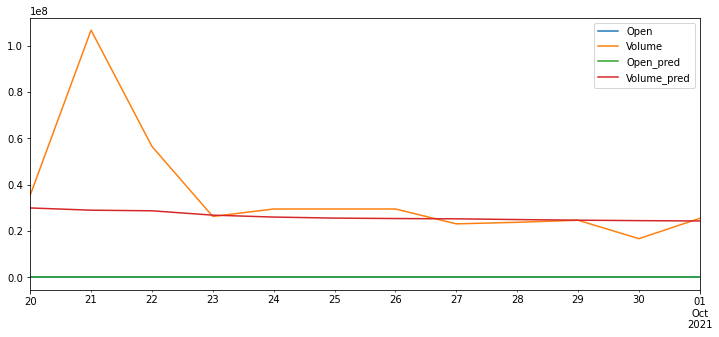

In [137]:
test_vs_pred.plot(figsize=(12,5))
# plt.plot(test['Open'],predictions['Open_pred'][:-1])

In [140]:
from sklearn.metrics import mean_squared_error as mse
import math
from statistics import mean

rmse_open = math.sqrt(mse(predictions['Open_pred'],test['Open']))
mean_open = mean(test['Open'])
rmse_V = math.sqrt(mse(predictions['Volume_pred'],test['Volume']))
mean_V = mean(test['Volume'])

print("Open : ",mean_open, rmse_open)
print("Volume : ",mean_V, rmse_V)

Open :  44.828749916666666 5.3415694842082475
Volume :  35544431.916666664 24067606.857955873
